# Homework 6 (more of a tutorial, really)

As I was browsing through Kaggle the other day, I came upon a brand new dataset from the University of Puerto Rico, which contains images of bees entering their hive.  The task is to determine automatically which bees are carrying pollen.  Your job will be to develop a convolutional neural network that performs this task.  

## 1. Load Data (0 pts)

First, we need to load the bee data, which is included along with this homework.  Fortunately, the authors of the Kaggle dataset provided a nice set of files which will do this for us, which I have reproduced below

In [46]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [47]:
path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [48]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [49]:
# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [50]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

X:  (714, 300, 180, 3)
y:  (714,)
Class 0:  345
Class 1:  369
Total  :  714


We can plot a couple of the images below.  If you check out a couple of these, you will see that the visible difference when bees carry pollen is the presence of large fluffy balls of pollen on their back legs.

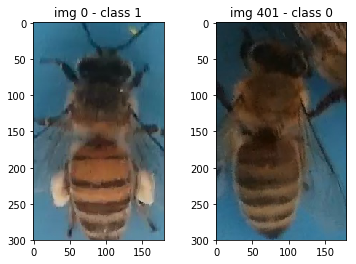

In [51]:
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=401
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

## 2. A convolutional network architecture for bee classification (40 pts)

**Implement a 2D convolutional neural network using Keras.  You are free to choose whatever network architecture you like.**

You can find all the relevant syntax for implementing such a network [here](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py), the Keras convnet example for MNIST.

*(For the sake of comparison, I will share the one that I used:*

Layer 1: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 2: 4x4 Max-pooling layer

Layer 3: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 4: 4x4 Max-pooling layer

Layer 5: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 6: 4x4 Max-pooling layer

Layer 7: Flattening layer

Layer 8: Dropout layer with 0.2 dropout probability

Layer 9: 1 node sigmoid layer


In [52]:
import keras
import keras.models as km
import keras.layers as kl

import numpy as np

input_shape = ((300,180,3))

model = km.Sequential()
#! Add layers to your convolutional neural network   
model.add(kl.Conv2D(24, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Conv2D(24, (5, 5), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Conv2D(24, (5, 5), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Flatten())
model.add(kl.Dropout(0.2))
model.add(kl.Dense(1, activation='sigmoid'))


## 3. Fitting the CNN to data (20 pts)

Compile your model, using a binary crossentropy loss function and an optimizer of your choosing (RMSprop worked well for me).  Select a batch size and number of epochs, and fit your model to the training data, while also keeping track of the test set accuracy.

**Plot the training and test accuracy of your model at each epoch.  Comment on whether you think the model is being overfit.**

Train on 571 samples, validate on 143 samples
Epoch 1/10
571/571 [==============================] - 22s 39ms/step - loss: 0.6893 - acc: 0.5324 - val_loss: 0.6872 - val_acc: 0.6364
Epoch 2/10
571/571 [==============================] - 22s 38ms/step - loss: 0.6762 - acc: 0.5954 - val_loss: 0.6660 - val_acc: 0.6434
Epoch 3/10
571/571 [==============================] - 22s 38ms/step - loss: 0.5894 - acc: 0.7040 - val_loss: 0.9767 - val_acc: 0.5315
Epoch 4/10
571/571 [==============================] - 21s 38ms/step - loss: 0.5338 - acc: 0.7478 - val_loss: 0.5402 - val_acc: 0.7343
Epoch 5/10
571/571 [==============================] - 21s 37ms/step - loss: 0.4448 - acc: 0.7863 - val_loss: 0.4447 - val_acc: 0.7692
Epoch 6/10
571/571 [==============================] - 22s 39ms/step - loss: 0.3265 - acc: 0.8511 - val_loss: 0.6011 - val_acc: 0.6853
Epoch 7/10
571/571 [==============================] - 24s 42ms/step - loss: 0.3157 - acc: 0.8634 - val_loss: 0.4473 - val_acc: 0.7203
Epoch 8/10
571/5

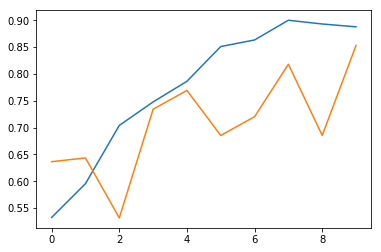

In [53]:
model.compile(loss = keras.losses.binary_crossentropy,                #! Specify a loss function
              optimizer = keras.optimizers.Adadelta(),           #! Specify an optimizer
              metrics=['accuracy'])

batch_size = 20                     #! Specify a batch size
epochs= 10                      #! Specify an epoch  
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

#! Plot test and training accuracy (note that the history.history object is a dictionary containing relevant info)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

I think the model is slightly overfit. The test set doesn't quite match the training set and the training set is above the test set which shows overfitting. When I did 100 epochs the accuracy ranged from 82% to 98%. I decreased it to 10 for faster run time and the accuracy ranged from 55% to 90%.

## 4. Model evaluation (20 pts)

Now that you have a trained model, make a prediction for the test set (model.predict is a useful function for this).  **Compute and display a confusion matrix.  Select and display an example from the test set of a true positive, a true negative, a false positive, and a false negative.  Speculate on the reasons behind misclassification for images that your model predicted incorrectly**.

Confusion Matrix:
[[58  4]
 [17 64]]
Accuracy:  85.3146853146853 %


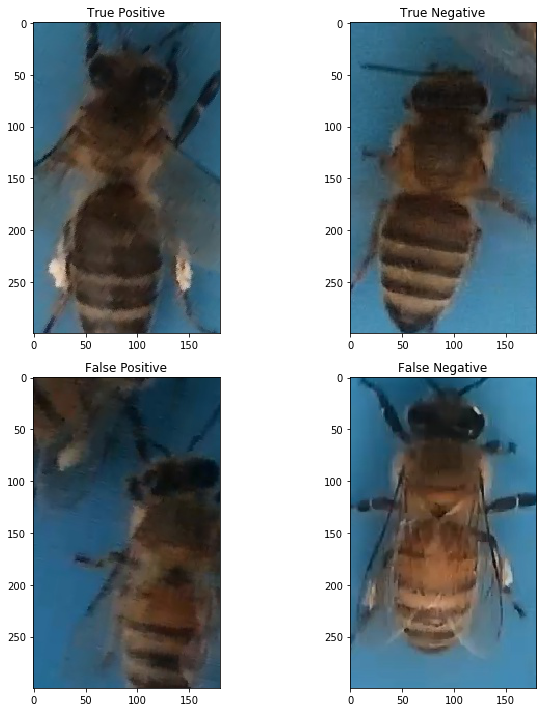

In [77]:
#! See above
from sklearn.metrics import confusion_matrix

#prediction
p = model.predict(X_test)

#find different classes based on prediction
c = []
for i in p:
    if i > 0.5:
        c.append(1)
    else:
        c.append(0)
#print(c)

#confustion matrix
matrix = confusion_matrix(c,y_test)
print("Confusion Matrix:")
print(matrix)

#accuracy
total = matrix.sum()
a = ((matrix[0,0] + matrix[1,1])/total) * 100
print("Accuracy: " , a , "%")

#get example for each classification 
for i in range(0, len(p)):
    if(y_test[i] == 1 and c[i] == 1):
        true_pos = i
    if(y_test[i] == 0 and c[i] == 0):
        true_neg = i
    if(y_test[i] ==1 and c[i] == 0):
        false_neg = i
    if(y_test[i] == 0 and c[i] == 1):
        false_pos = i

fig, axes = plt.subplots(2,2, figsize = (10,10))

#true positive
plt.sca(axes[0,0])
plt.imshow(X_test[true_pos])
plt.title("True Positive")

#true negative
plt.sca(axes[0,1])
plt.imshow(X_test[true_neg])
plt.title("True Negative")

#false positive
plt.sca(axes[1,0])
plt.imshow(X_test[false_pos])
plt.title("False Positive")

#false negative
plt.sca(axes[1,1])
plt.imshow(X_test[false_neg])
plt.title("False Negative")

plt.tight_layout()


Reasons behind misclassification:
False positive - Here the picture does not capture the whole body of the bee and the legs are blurry. Part of another bee is captured in the picture with what lots like pollen, therefore it detects a positive.
False Negative - To me, the picture clearly looks like a positive. It may have gotten detected as a negative because of the larger size of the bee and the wings are partially covering the legs.